<font color=#00008b size=5 face="黑體">**載入基本 package**</font>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline
plt.style.use("ggplot")
import sklearn

<font color=#00008b size=5 face="黑體">**資料讀取. 探索. 處理**</font>

### 資料三 | [Bank Marketing](https://archive.ics.uci.edu/ml/datasets/bank+marketing)

**變數解釋**  
看網址~~
  
**預測變數**  
y:has the client subscribed a term deposit? (pos: yes , neg: no)  

In [2]:
bank_df = pd.read_csv('.\\data\\3.bank-full.csv', sep=';')
print('bank_df:', bank_df.shape)
bank_df.head(3)

bank_df: (45211, 17)


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no


In [3]:
# split data by the label
bank_pos = bank_df[bank_df["y"] == "yes"]
bank_neg = bank_df[bank_df["y"] == "no"]
bank_df["y_n"] = bank_df["y"].map({"yes":1, "no":0})

In [4]:
data_y = bank_df.y
print(data_y.value_counts())
print('\npos% :', data_y.value_counts()[1]/len(data_y))

no     39922
yes     5289
Name: y, dtype: int64

pos% : 0.11698480458295547


In [5]:
# 資料基本描述
def data_explore(df):
    print("*Missing values :  ", df.isnull().sum().values.sum())
    print("*duplicate values :  ", df.duplicated().sum(), sep='')
    print("*Unique values & feature type : ")
    display(pd.DataFrame({'unique values':df.nunique(), 'feature type':df.dtypes}))

# 區分連續與量化資料
def split_data_by_feature_types(df):
    df_categorial, df_quantitative = [], []
    for col_name, types in zip(df.columns, df.dtypes):
        if types in ['object','bool']:
            df_categorial.append(col_name)
        else:
            df_quantitative.append(col_name)
    df_categorial = df[df_categorial]
    df_quantitative = df[df_quantitative]
    
    return df_categorial, df_quantitative

data_explore(bank_df)
bank_categorial, bank_quantitative = split_data_by_feature_types(bank_df)

*Missing values :   0
*duplicate values :  0
*Unique values & feature type : 


,unique values,feature type
age,77,int64
job,12,object
marital,3,object
education,4,object
default,2,object
balance,7168,int64
housing,2,object
loan,2,object
contact,3,object
day,31,int64


In [10]:
bank_categorial.columns

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome', 'y'],
      dtype='object')

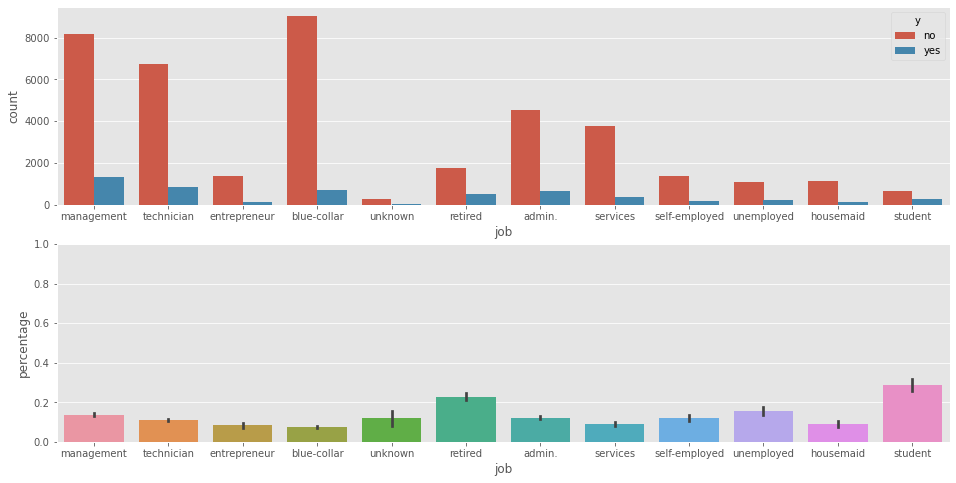

In [24]:
# 類別變數繪圖 (countplot, barplot) -- job
feature = "job"
fig, axes = plt.subplots(nrows = 2, ncols = 1, figsize = (16,8))
ax1 = sns.countplot(x=feature, data=bank_df, hue="y", ax=axes[0])
ax2 = sns.barplot(x=feature, y='y_n', data=bank_df, ax=axes[1])
ax2.set_ylabel('percentage')
ax2.set(ylim=(0, 1))
plt.show()

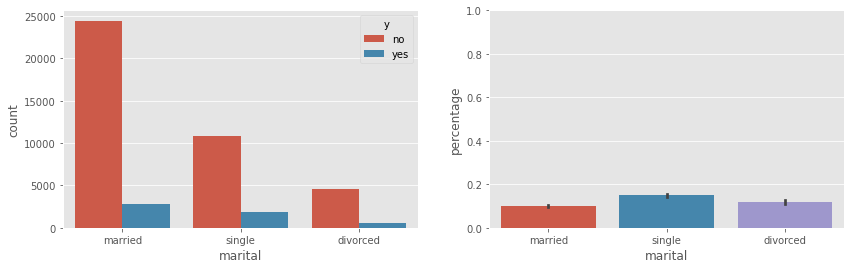

In [26]:
# 類別變數繪圖 (countplot, barplot) -- marital: marital status
feature = "marital"
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (14,4))
ax1 = sns.countplot(x=feature, data=bank_df, hue="y", ax=axes[0])
ax2 = sns.barplot(x=feature, y='y_n', data=bank_df, ax=axes[1])
ax2.set_ylabel('percentage')
ax2.set(ylim=(0, 1))
plt.show()

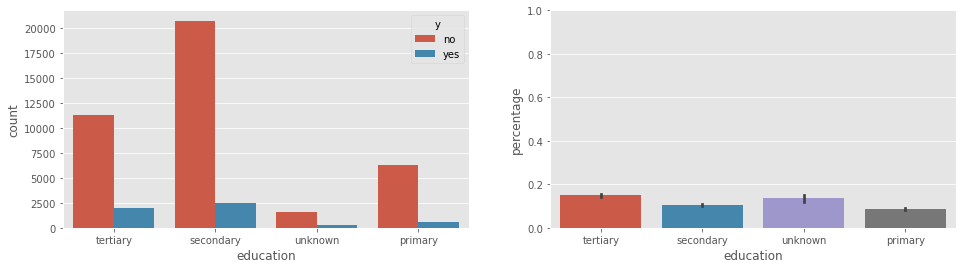

In [22]:
# 類別變數繪圖 (countplot, barplot) -- education
feature = "education"
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (16,4))
ax1 = sns.countplot(x=feature, data=bank_df, hue="y", ax=axes[0])
ax2 = sns.barplot(x=feature, y='y_n', data=bank_df, ax=axes[1])
ax2.set_ylabel('percentage')
ax2.set(ylim=(0, 1))
plt.show()

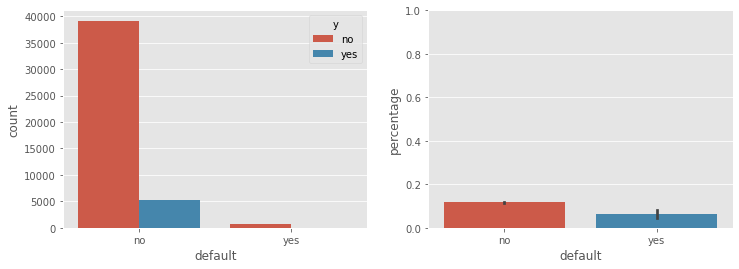

In [19]:
# 類別變數繪圖 (countplot, barplot) -- default: has credit in default?
feature = "default"
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (12,4))
ax1 = sns.countplot(x=feature, data=bank_df, hue="y", ax=axes[0])
ax2 = sns.barplot(x=feature, y='y_n', data=bank_df, ax=axes[1])
ax2.set_ylabel('percentage')
ax2.set(ylim=(0, 1))
plt.show()

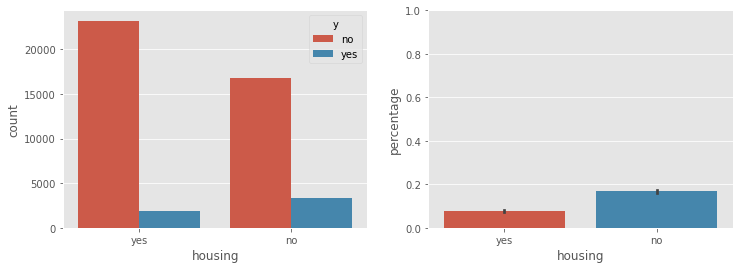

In [18]:
# 類別變數繪圖 (countplot, barplot) -- housing: has housing loan?
feature = "housing"
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (12,4))
ax1 = sns.countplot(x=feature, data=bank_df, hue="y", ax=axes[0])
ax2 = sns.barplot(x=feature, y='y_n', data=bank_df, ax=axes[1])
ax2.set_ylabel('percentage')
ax2.set(ylim=(0, 1))
plt.show()

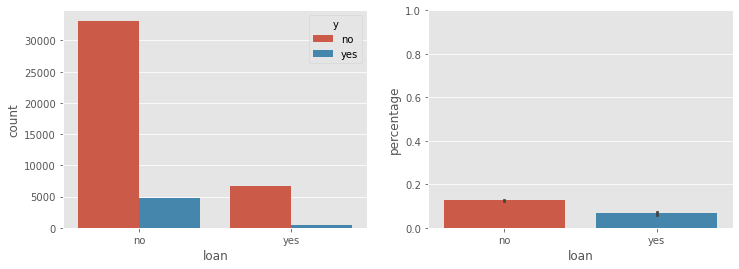

In [17]:
# 類別變數繪圖 (countplot, barplot) -- loan: has personal loan?
feature = "loan"
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (12,4))
ax1 = sns.countplot(x=feature, data=bank_df, hue="y", ax=axes[0])
ax2 = sns.barplot(x=feature, y='y_n', data=bank_df, ax=axes[1])
ax2.set_ylabel('percentage')
ax2.set(ylim=(0, 1))
plt.show()

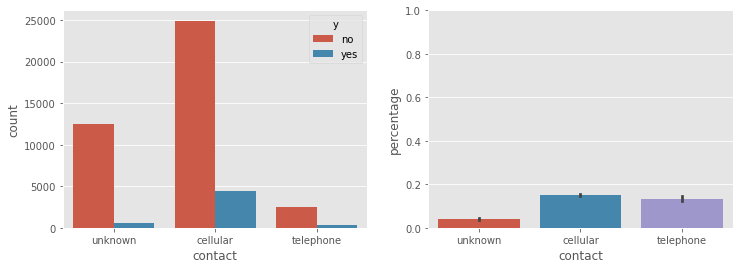

In [15]:
# 類別變數繪圖 (countplot, barplot) -- contact: contact communication type
feature = "contact"
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (12,4))
ax1 = sns.countplot(x=feature, data=bank_df, hue="y", ax=axes[0])
ax2 = sns.barplot(x=feature, y='y_n', data=bank_df, ax=axes[1])
ax2.set_ylabel('percentage')
ax2.set(ylim=(0, 1))
plt.show()

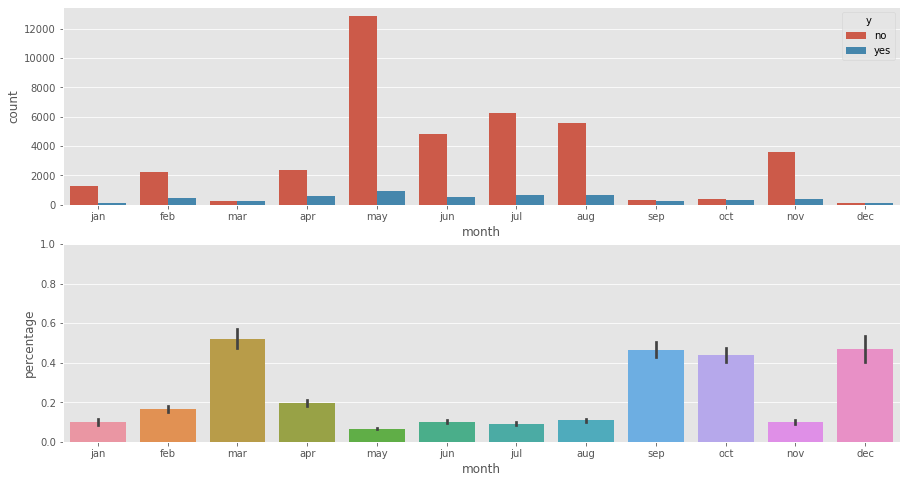

In [27]:
# 類別變數繪圖 (countplot, barplot) -- month: last contact month of year
month_sort = ['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec']
feature = "month"
fig, axes = plt.subplots(nrows = 2, ncols = 1, figsize = (15,8))
ax1 = sns.countplot(x=feature, data=bank_df, hue="y", ax=axes[0], order = month_sort)
ax2 = sns.barplot(x=feature, y='y_n', data=bank_df, ax=axes[1], order = month_sort)
ax2.set_ylabel('percentage')
ax2.set(ylim=(0, 1))
plt.show()

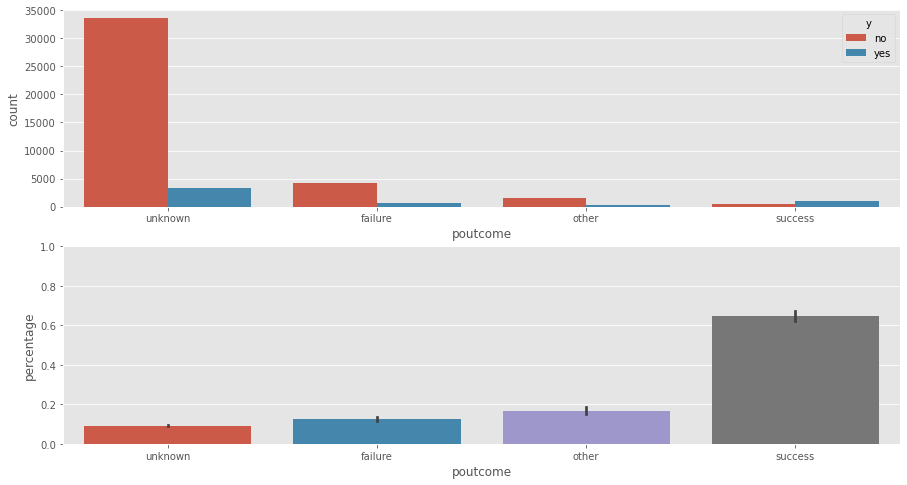

In [12]:
# 類別變數繪圖 (countplot, barplot) -- poutcome: outcome of the previous marketing campaign
feature = "poutcome"
fig, axes = plt.subplots(nrows = 2, ncols = 1, figsize = (15,8))
ax1 = sns.countplot(x=feature, data=bank_df, hue="y", ax=axes[0])
ax2 = sns.barplot(x=feature, y='y_n', data=bank_df, ax=axes[1])
ax2.set_ylabel('percentage')
ax2.set(ylim=(0, 1))
plt.show()

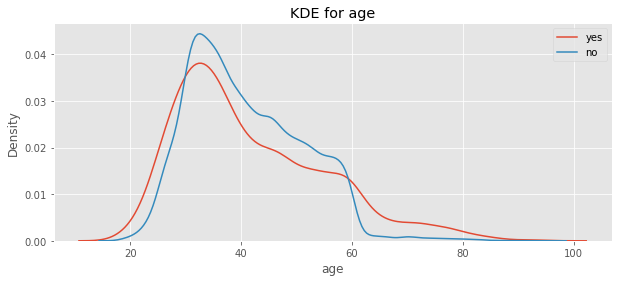

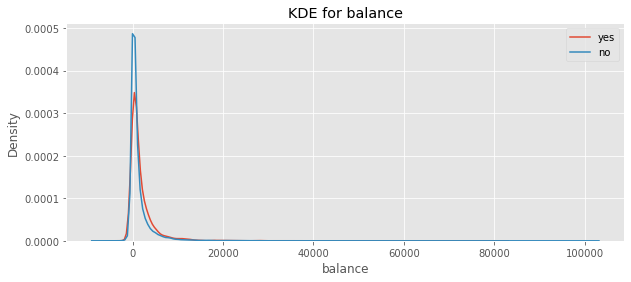

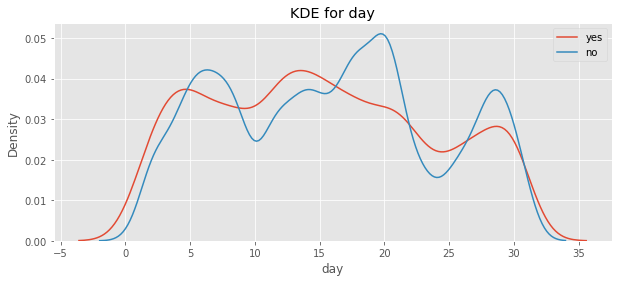

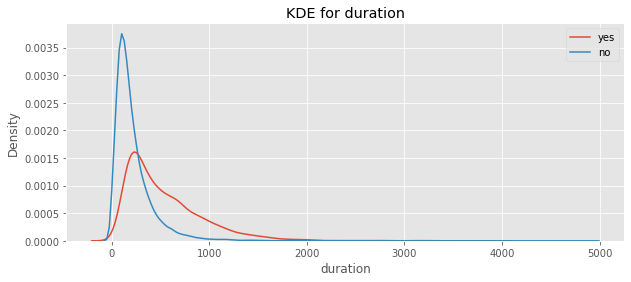

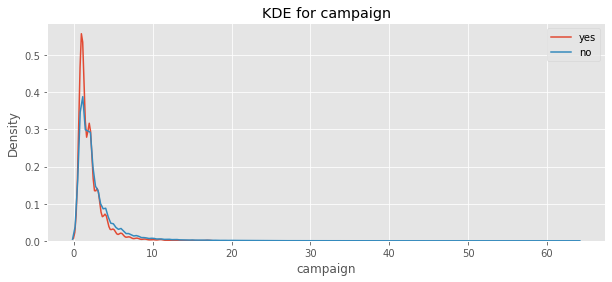

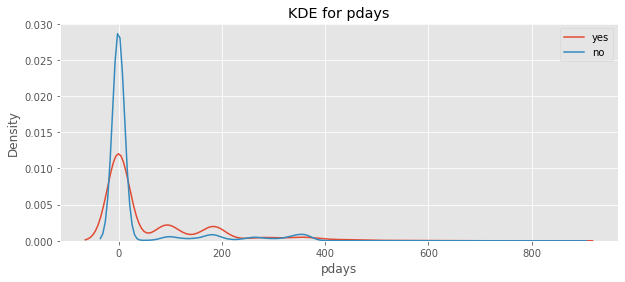

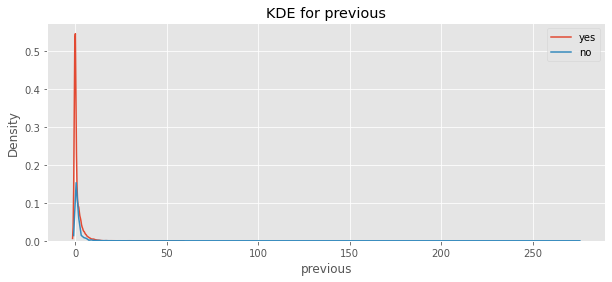

In [7]:
# 量化變數繪圖 (KDE plot)
for feature in bank_quantitative.columns.drop('y_n'):
    plt.figure(figsize=(10,4))
    plt.title("KDE for {}".format(feature))
    sns.kdeplot(bank_pos[feature], label='yes')
    sns.kdeplot(bank_neg[feature], label='no')
    plt.legend()
    plt.show()

<AxesSubplot:>

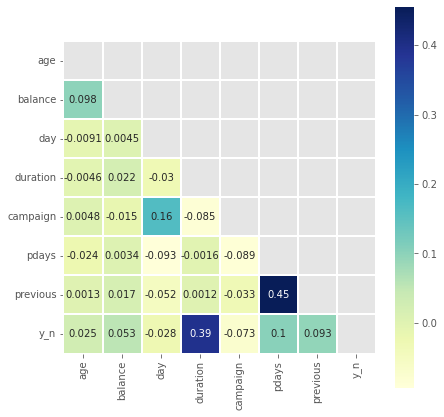

In [8]:
plt.figure(figsize=(7, 7))
corr = bank_df.corr()
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool_)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr, xticklabels=corr.columns,mask=mask, yticklabels=corr.columns, square=True,
                  linewidths=.2, cmap="YlGnBu",annot=True)

In [9]:
# 區分連續與量化資料
bank_categorial, bank_quantitative = split_data_by_feature_types(bank_df)

bank_X = bank_df.drop(columns=['y', 'y_n'])
bank_y_f = ["y"] #目標變數
cat_cols   = bank_categorial.columns.drop("y")  #類別變數
num_cols   = bank_quantitative.columns.drop("y_n")  #數值變數
bin_cols   = bank_X.nunique()[bank_X.nunique() == 2].keys().tolist()  #二元變數
multi_cols = [i for i in cat_cols if i not in bin_cols]  #多元變數

#對二元變數編碼
encoder = LabelEncoder()
for i in bin_cols :
    bank_X[i] = encoder.fit_transform(bank_X[i])
    
#對多元變數編碼
bank_X = pd.get_dummies(data = bank_X, columns = multi_cols)

#標準化數值變數
std = StandardScaler()
bank_X[num_cols] = std.fit_transform(bank_X[num_cols])

NameError: name 'LabelEncoder' is not defined